In [1]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
def read_X(filename):
    X = list()
    with open(filename) as f:
        while True:
            line = f.readline()
            if not line:
                break
            amplitudes = [int(x) for x in line.strip().split(',')]
            intervals = [int(x) for x in f.readline().strip().split(',')]
            
            f.readline() # skip an empty line
            X.append((amplitudes, intervals))
    return X

In [3]:
X_train_ecg = read_X('X.train.csv')
X_test_ecg = read_X('X.test.csv')
print len(X_train_ecg), len(X_test_ecg)

900 903


In [4]:
y_train = list()
for line in open('y.train.csv'):
    y_train.append(int(line))
print len(y_train)

900


In [5]:
def discretize(X):
    discrete = list()
    for amps, ints in X:
        amps = np.array(amps).astype(float)
        ints = np.array(ints).astype(float)
        alphas = np.arctan(amps / ints)

        amps = np.diff(amps)
        ints = np.diff(ints)
        alphas = np.diff(alphas)

        s = list()
        for ind, r, t, a in zip(range(600), amps, ints, alphas):
            c = 'x'
            if r > 0 and t > 0 and a > 0:
                c = 'a'
            if r <= 0 and t <= 0 and a > 0:
                c = 'b'
            if r > 0 and t <= 0 and a > 0:
                c = 'c'
            if r <= 0 and t > 0 and a <= 0:
                c = 'd'
            if r > 0 and t > 0 and a <= 0:
                c = 'e'
            if r <= 0 and t <= 0 and a <= 0:
                c = 'f'
            if c == 'x':
                print 'Very strange!!!', ind, r, t, a
            s.append(c)

        discrete.append(s)
    return discrete

In [6]:
X_train_discrete = discretize(X_train_ecg)
X_test_discrete = discretize(X_test_ecg)
print len(X_train_discrete), len(X_test_discrete)

900 903


In [7]:
from collections import defaultdict
from itertools import product

def vectorize(discrete):
    vectorized = list()
    for element in discrete:
        current = defaultdict(int)
        for j in range(597):
            current[tuple(element[j:j+3])] += 1

        vect = list()
        for a, b, c in product('abcdef', 'abcdef', 'abcdef'):
            vect.append(current[(a, b, c)])
        vectorized.append(vect)
    return np.array(vectorized).astype(float)

In [8]:
X_train = vectorize(X_train_discrete)
X_test = vectorize(X_test_discrete)
print X_train.shape, X_test.shape

(900, 216) (903, 216)


In [26]:
Data = pd.concat([pd.DataFrame(data=X_train),pd.DataFrame(data=y_train, columns=['Class'])], axis=1)
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,Class
0,0,0,0,0,0,0,0,0,2,0,...,1,0,1,0,1,1,0,0,0,0
1,0,1,0,1,0,0,1,1,1,10,...,0,0,0,2,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,2,0,1,1,0,1,1
3,2,1,4,15,0,42,0,0,0,1,...,0,0,1,41,1,1,2,1,2,1
4,0,0,0,1,0,1,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1


1


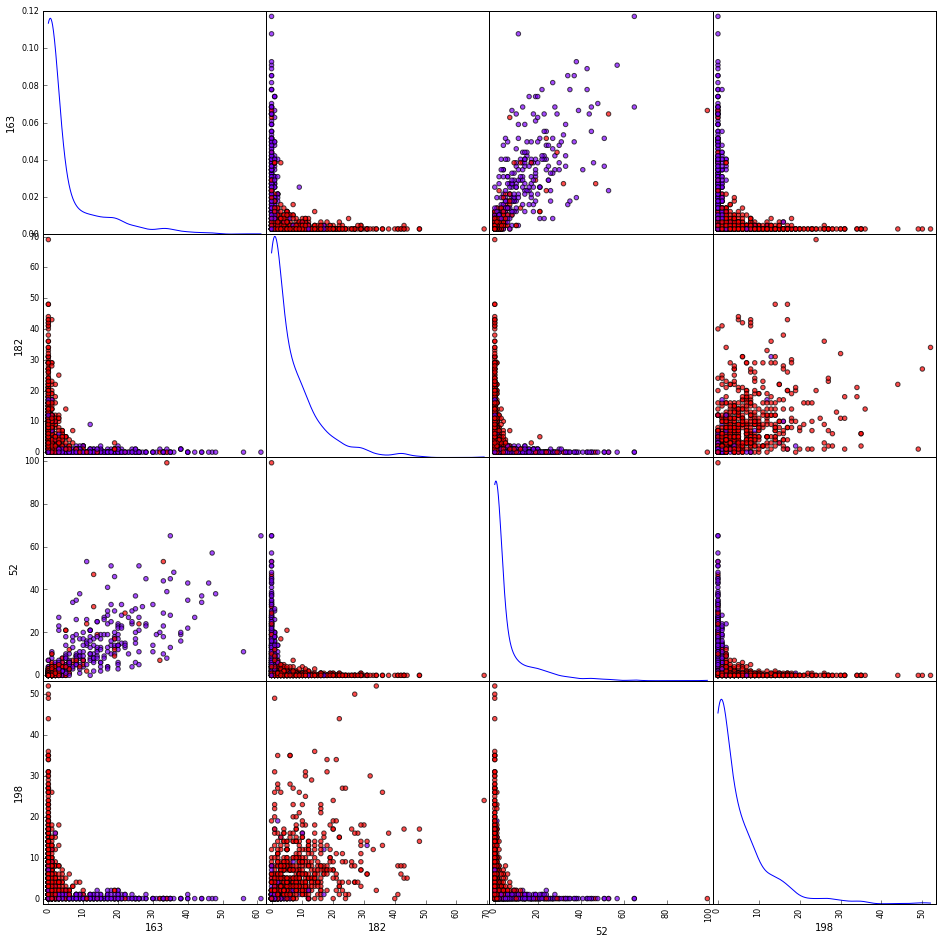

In [103]:
features=[163,182,52,198,102,33,17,169,151,125,200,15,113,64,105,99,63,100,108,40,197,89,185,30,152,77,110,167,90,107,104,115,175,116,173,32
,126,46,20,183,95,76,195,122,92,114,194,87,18,188,111,27,210,171,139,179,192,140,180,39,138,176,164,48,120,127,51,35,44,186]
from pandas.tools.plotting import scatter_matrix
scatter_matrix(Data.iloc[:,features[0:4]], alpha=0.7, figsize=(16, 16), diagonal='kde', c=Data['Class'].values, cmap='rainbow', marker="o")
print 1

In [121]:
Data[Data.Class == 1][163].describe(percentiles=[.99])

count    628.000000
mean       1.232484
std        3.397639
min        0.000000
50%        0.000000
95%        5.000000
max       34.000000
Name: 163, dtype: float64

In [144]:
surges = [key for key, value in (Data[Data.Class == 1][163] > 19).iteritems() if value]
Data.iloc[surges,163]

342    32
368    26
399    33
681    22
749    34
Name: 163, dtype: float64

1


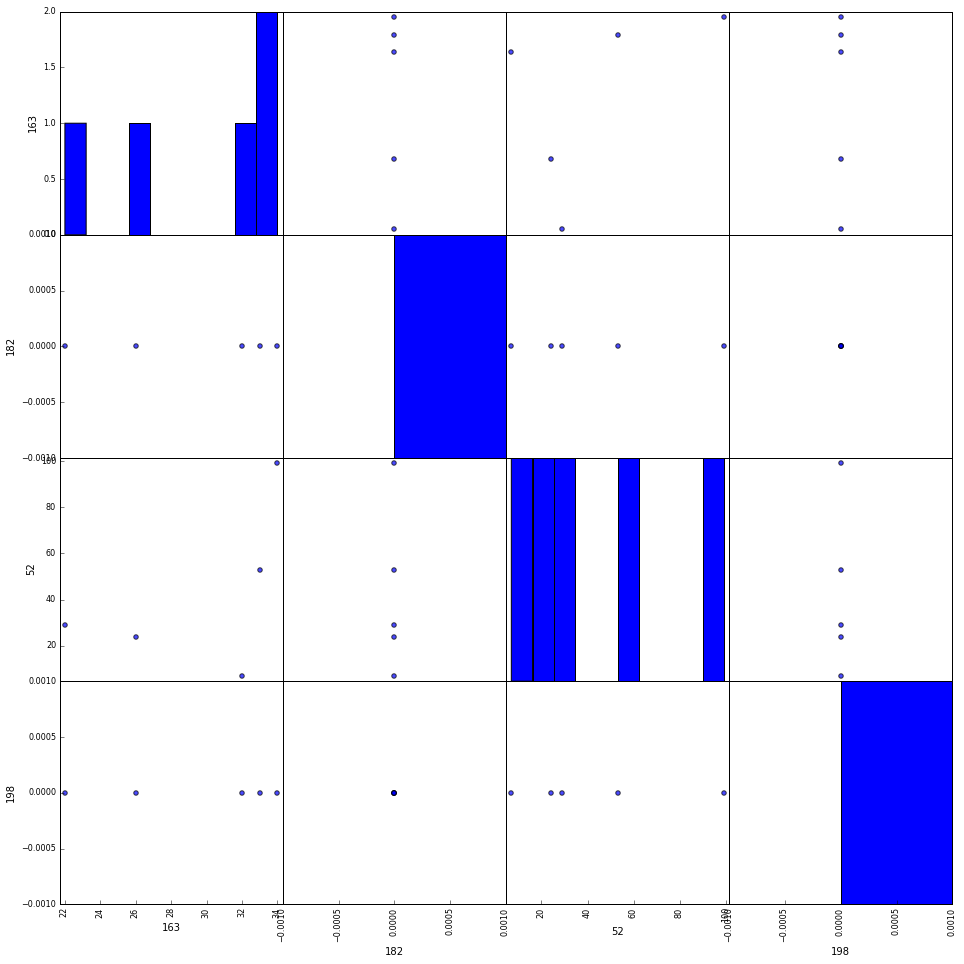

In [137]:
scatter_matrix(Data.iloc[surges,features[0:4]], alpha=0.7, figsize=(16, 16),  marker="o")
print 1

In [140]:
Data.iloc[surges,52]

342     7
368    24
399    53
681    29
749    99
Name: 52, dtype: float64

In [145]:
Data[Data.Class == 1][52].describe(percentiles=[.99])

count    628.000000
mean       1.399682
std        5.682829
min        0.000000
50%        0.000000
99%       23.190000
max       99.000000
Name: 52, dtype: float64

In [146]:
surges = [key for key, value in (Data[Data.Class == 1][52] > 23.2).iteritems() if value]
Data.iloc[surges,52]

250    32
277    47
368    24
399    53
681    29
749    99
893    24
Name: 52, dtype: float64

In [147]:
Data[Data.Class == 1][198].describe(percentiles=[.99])

count    628.000000
mean       7.047771
std        7.681101
min        0.000000
50%        5.000000
99%       35.000000
max       52.000000
Name: 198, dtype: float64

In [148]:
surges = [key for key, value in (Data[Data.Class == 1][198] > 35).iteritems() if value]
Data.iloc[surges,198]

223    36
279    50
448    52
668    49
707    44
Name: 198, dtype: float64

##Отбор объектов с помощью KNN

In [9]:
from sklearn.cross_validation import LeaveOneOut

In [10]:
X = np.zeros((X_train.shape[0] + X_test.shape[0], X_train.shape[1]), dtype='float')
X[0:X_train.shape[0]] = X_train
X[X_train.shape[0]:] = X_test
print X_train.shape, X_test.shape, X.shape

(900, 216) (903, 216) (1803, 216)


In [11]:
from sklearn import preprocessing
X_preprocessed = preprocessing.scale(X)
print X_preprocessed.shape
X_train_preprocessed = X_preprocessed[0:X_train.shape[0]]
X_test_preprocessed = X_preprocessed[X_train.shape[0]:]
print X_train_preprocessed.shape, X_test_preprocessed.shape

(1803, 216)
(900, 216) (903, 216)


In [12]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import roc_auc_score

import time

params = {'n_neighbors': np.arange(1, 200, 5), 'p': [1, 2], 'weights': [ 'distance']}
grid_searcher = GridSearchCV(KNN(),\
                             params, cv=5, scoring='roc_auc', n_jobs=4)
start = time.time()
grid_searcher.fit(X_train_preprocessed, y_train)
print "Fit is completed. Time: %f" % (time.time() - start)

print grid_searcher.best_score_
print grid_searcher.best_estimator_

Fit is completed. Time: 15.790535
0.957244656085
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=56, p=2, weights='distance')


In [55]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
good_features = []
start = time.time()
new_current_quality = 0.01
current_quality = 0
best_feature = 0
best_knn = 0
while new_current_quality - current_quality > 0.0001:
    current_quality = new_current_quality
    print len(good_features)
    sign = 0
    start_fit = time.time()
    for feature_index in xrange(216):
        if not feature_index in good_features:
            #print features_index
            '''params = {'n_neighbors': np.arange(10, 30, 5), 'p': [1], 'weights': [ 'distance']}
            grid_searcher = GridSearchCV(KNN(),params, cv=5, scoring='roc_auc', n_jobs=1)'''
            params = {'criterion': ['entropy'], 'min_samples_split': [2,4,8], 'min_samples_leaf': [1,2,4]}
            grid_searcher = GridSearchCV(RandomForestClassifier(n_estimators=100),\
                             params, cv=5, scoring='roc_auc', n_jobs=4)
            index = list(good_features) + [features_index]
            #print index
            grid_searcher.fit(X_train_preprocessed[:,index], y_train)
            if new_current_quality < grid_searcher.best_score_:
                new_current_quality = grid_searcher.best_score_
                best_feature = features_index
                best_knn = grid_searcher.best_estimator_
                sign = 1
        else:
            '''params = {'n_neighbors': np.arange(10, 30, 5), 'p': [1], 'weights': [ 'distance']}
                grid_searcher = GridSearchCV(KNN(), params, cv=5, scoring='roc_auc', n_jobs=1)'''        
            params = {'criterion': ['entropy'], 'min_samples_split': [2,4,8], 'min_samples_leaf': [1,2,4]}
            grid_searcher = GridSearchCV(RandomForestClassifier(n_estimators=100),\
                             params, cv=5, scoring='roc_auc', n_jobs=4)
            index = list(good_features) - [features_index]
            #print index
            grid_searcher.fit(X_train_preprocessed[:,index], y_train)
            if new_current_quality < grid_searcher.best_score_:
                new_current_quality = grid_searcher.best_score_
                best_feature = features_index
                best_knn = grid_searcher.best_estimator_
                sign = - 1
    if sign == 1:
        good_features.append(best_feature)
    elif sign == -1:
        good_features.remove(best_feature)
    else:
        print 'ERROR!'
    print best_knn
    print good_features
    print new_current_quality, current_quality
    print "Time: %f" % (time.time() - start_fit)
print "Time: %f" % (time.time() - start)
print current_quality
print good_features

0


KeyboardInterrupt: 

In [188]:
print good_features
X_train_preprocessed[:,good_features].shape

[182, 90, 108, 185, 87, 33, 52, 95, 104, 51, 195, 110, 102, 111, 195, 125]


(900, 16)

In [13]:
loo = LeaveOneOut(900)
i = 0
error = np.zeros(X_train.shape[0])
y_train = np.array(y_train)
for train, test in loo:
    start = time.time()
    print type(train[0])
    grid_searcher.best_estimator_.fit(X_train_preprocessed[map(int, train)], y_train[map(int, train)])
    print "Fit without %d object is completed. Time: %0.2f" % (i , time.time() - start)
    i += 1
    error[test[0]] = abs(y_train[test[0]] - grid_searcher.best_estimator_.predict_proba(X_train_preprocessed[test,:])[:,1])

<type 'numpy.int64'>
Fit without 0 object is completed. Time: 0.01
<type 'numpy.int64'>
Fit without 1 object is completed. Time: 0.01
<type 'numpy.int64'>
Fit without 2 object is completed. Time: 0.01
<type 'numpy.int64'>
Fit without 3 object is completed. Time: 0.01
<type 'numpy.int64'>
Fit without 4 object is completed. Time: 0.01
<type 'numpy.int64'>
Fit without 5 object is completed. Time: 0.01
<type 'numpy.int64'>
Fit without 6 object is completed. Time: 0.01
<type 'numpy.int64'>
Fit without 7 object is completed. Time: 0.01
<type 'numpy.int64'>
Fit without 8 object is completed. Time: 0.01
<type 'numpy.int64'>
Fit without 9 object is completed. Time: 0.01
<type 'numpy.int64'>
Fit without 10 object is completed. Time: 0.01
<type 'numpy.int64'>
Fit without 11 object is completed. Time: 0.01
<type 'numpy.int64'>
Fit without 12 object is completed. Time: 0.01
<type 'numpy.int64'>
Fit without 13 object is completed. Time: 0.01
<type 'numpy.int64'>
Fit without 14 object is completed. T

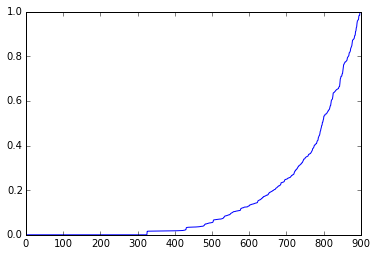

In [14]:
plot(sorted(error))

In [15]:
np.argsort(error)

array([695, 233, 232, 231, 384, 709, 386, 227, 226, 715, 224, 223, 388,
       610, 721, 725, 217, 216, 234, 215, 707, 704, 255, 613, 379, 697,
       698, 249, 699, 247, 246, 245, 380, 612, 702, 241, 240, 383, 238,
       705, 694, 730, 211, 188, 758, 186, 185, 601, 760, 182, 761, 179,
       765, 596, 176, 175, 636, 402, 403, 405, 189, 732, 397, 192, 210,
       735, 604, 738, 393, 204, 741, 394, 743, 395, 746, 750, 603, 196,
       195, 194, 751, 755, 773, 257, 376, 324, 323, 650, 321, 320, 319,
       317, 355, 315, 314, 313, 653, 311, 310, 309, 357, 626, 325, 306,
       327, 329, 346, 345, 637, 349, 639, 641, 340, 339, 338, 643, 644,
       632, 334, 646, 647, 629, 330, 649, 258, 655, 302, 679, 369, 370,
       274, 273, 684, 271, 270, 685, 617, 688, 266, 265, 264, 692, 616,
       614, 619, 303, 279, 621, 360, 300, 299, 298, 661, 296, 361, 294,
       362, 665, 668, 625, 671, 287, 364, 675, 676, 281, 168, 767, 832,
       843, 847,  60,  59, 471,  56, 850,  54, 472, 474,  51, 53

In [16]:
len([err for err in error if err > 0.7])

54

In [28]:
good_object = np.sort(np.argsort([err for err in error if err < 0.7]))
print len(good_object)

846


In [42]:
from sklearn.ensemble import RandomForestClassifier
params = {'criterion': ['entropy'], 'min_samples_split': [2,4,8], 'min_samples_leaf': [1,2,4]}
grid_searcher = GridSearchCV(RandomForestClassifier(n_estimators=1000),\
                             params, cv=5, scoring='roc_auc', n_jobs=1)
start = time.time()
grid_searcher.fit(X_train[good_object, :], y_train[good_object])
print "Fit is completed. Time: %f" % (time.time() - start)
print grid_searcher.best_score_
print grid_searcher.best_estimator_
RandomForest = grid_searcher.best_estimator_

Fit is completed. Time: 100.006497
0.967481286264
RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)


In [19]:
print min(RandomForest.feature_importances_)

0.000312217803962


In [20]:
feature_weights = np.zeros(X_train.shape[1])
X_train_rf_fs = X_train_preprocessed
X_test_rf_fs = X_test_preprocessed
for feature_index, feature_weight in enumerate(RandomForest.feature_importances_):
    if feature_weight > 0.0027:
        feature_weights[feature_index] = feature_weight
    else:
        feature_weights[feature_index] = 0
        X_train_rf_fs[:, feature_index] = 0
        X_test_rf_fs[:, feature_index] = 0

In [21]:
pd.DataFrame(X_train_rf_fs).head()

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,0,0,-0.568953,0,0,-0.687973,0,0,0,0,...,0,0,0,0,-0.769049,0,0,0,0,0
1,0,0,-0.568953,0,0,-0.687973,0,0,0,0,...,0,0,0,0,-0.609935,0,0,0,0,0
2,0,0,-0.568953,0,0,-0.687973,0,0,0,0,...,0,0,0,0,-0.609935,0,0,0,0,0
3,0,0,0.186022,0,0,2.941248,0,0,0,0,...,0,0,0,0,2.492778,0,0,0,0,0
4,0,0,-0.568953,0,0,-0.601563,0,0,0,0,...,0,0,0,0,-0.689492,0,0,0,0,0


In [22]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,0,0,0,0,0,0,0,0,2,0,...,0,1,0,1,0,1,1,0,0,0
1,0,1,0,1,0,0,1,1,1,10,...,2,0,0,0,2,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,1,0,1
3,2,1,4,15,0,42,0,0,0,1,...,1,0,0,1,41,1,1,2,1,2
4,0,0,0,1,0,1,1,0,1,1,...,0,0,0,0,1,0,1,0,0,0


In [23]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import roc_auc_score

import time

params = {'n_neighbors': np.arange(1, 20, 1), 'p': [1], 'weights': [ 'distance'], 'metric': ['wminkowski'], 'metric_params': [{'w': feature_weights}]}
grid_searcher = GridSearchCV(KNN(),\
                             params, cv=5, scoring='roc_auc', n_jobs=4)
start = time.time()
grid_searcher.fit(X_train_preprocessed, y_train)
print "Fit is completed. Time: %f" % (time.time() - start)

print grid_searcher.best_score_
print grid_searcher.best_estimator_

Fit is completed. Time: 18.294104
0.963301563786
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='wminkowski',
           metric_params={'w': array([ 0.,  0., ...,  0.,  0.])},
           n_neighbors=18, p=1, weights='distance')


In [27]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import roc_auc_score

import time

params = {'n_neighbors': np.arange(8, 20, 1), 'p': [1], 'weights': ['distance'], 'metric': ['wminkowski'], 'metric_params': [{'w': feature_weights}]}
grid_searcher = GridSearchCV(KNN(),\
                             params, cv=5, scoring='roc_auc', n_jobs=1)
start = time.time()
grid_searcher.fit(X_train_preprocessed[good_object, :], y_train[good_object])
print "Fit is completed. Time: %f" % (time.time() - start)

print grid_searcher.best_score_
best_knn=grid_searcher.best_estimator_
print best_knn

Fit is completed. Time: 27.073763
0.967911578906
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='wminkowski',
           metric_params={'w': array([ 0.,  0., ...,  0.,  0.])},
           n_neighbors=19, p=1, weights='distance')


In [47]:
clf_knn = best_knn.fit(X_train_preprocessed[good_object, :], y_train[good_object])
results_knn = clf_knn.predict_proba(X_test_preprocessed)[:, 1]
clf_rf = RandomForest.fit(X_train_preprocessed[good_object, :], y_train[good_object])
results_rf = clf_rf.predict_proba(X_test_preprocessed)[:, 1]
results = results_knn * 0.4 + 0.6 * results_rf
f = open('y.test.rf.csv', 'w')
print >> f, 'Id,Prediction'
for i, result in enumerate(results_rf):
    print >> f, str(i+1) + ',' + str(result)
f.close()

In [ ]:
##Комбинация KNN и RF

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn import cross_validation
quality = []
alphas = []
for alpha in np.arange(0,1.1,0.1):
    kf = cross_validation.KFold(846, n_folds=5)
    score = 0
    for train_index, test_index in kf:
        knn_clf = best_knn.fit(X_train_preprocessed[good_object[train_index], :], y_train[good_object[train_index]])
        results_knn = knn_clf.predict_proba(X_train_preprocessed[good_object[test_index], :])[:, 1]
        rf_clf = RandomForest.fit(X_train_preprocessed[good_object[train_index], :], y_train[good_object[train_index]])
        results_rf = rf_clf.predict_proba(X_train_preprocessed[good_object[test_index], :])[:, 1]
        results = results_knn * alpha + (1 - alpha) * results_rf
        score += roc_auc_score( y_train[good_object[test_index]], results)
    print alpha, score/5
    quality.append(score/5)
    alphas.append(alpha)

0.0 0.969393255399
0.1 0.969014853346
0.2 0.969957556297
0.3 0.970345810911
0.4 0.97046252646
0.5 0.970286677971
0.6 0.970174193422
0.7 0.968952113063
0.8 0.968094905265
0.9 0.968032792045
1.0 0.967377341081


(0.96, 0.972)

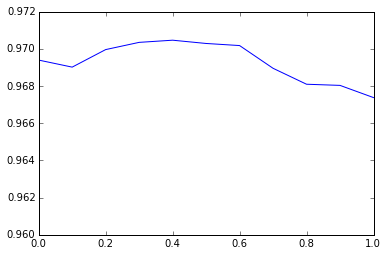

In [45]:
plot(alphas, quality)
ylim(0.96, 0.972)

In [124]:
def get_object_weight(distances):
    return np.array([1. / (distance) for  distance in distances])

In [127]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier as KNN
import time

params = {'n_neighbors': np.arange(8, 16, 1), 'p': [1], 'weights': ['distance'], 'metric': ['wminkowski'], 'metric_params': [{'w': feature_weights}]}
grid_searcher = GridSearchCV(KNN(),\
                             params, cv=5, scoring='roc_auc', n_jobs=4)
start = time.time()
grid_searcher.fit(X_train_preprocessed[good_object], y_train[good_object])
print "Fit is completed. Time: %f" % (time.time() - start)

print grid_searcher.best_score_
print grid_searcher.best_estimator_

Fit is completed. Time: 7.782043
0.967930806296
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='wminkowski',
           metric_params={'w': array([ 0.,  0., ...,  0.,  0.])},
           n_neighbors=11, p=1, weights='distance')


In [128]:
clf = KNN(n_neighbors=11, p=1, weights=get_object_weight, metric='wminkowski', metric_params={'w': feature_weights})
clf2 = clf.fit(X_train_preprocessed, y_train)
results = clf2.predict(X_test_preprocessed)[:, 1]
#f = open('y.test.knn.allobjects_erros.csv', 'w')
#print >> f, 'Id,Prediction'
#for i, result in enumerate(results):
#    print >> f, str(i+1) + ',' + str(result)
#f.close()

IndexError: too many indices

In [149]:
from sklearn.ensemble import RandomForestClassifier
params = {'criterion': ['gini', 'entropy'],'min_samples_split': [2,4,8], 'min_samples_leaf': [1,2,4,8]}
grid_searcher = GridSearchCV(RandomForestClassifier(n_estimators=10000, n_jobs=4),\
                             params, cv=5, scoring='roc_auc', n_jobs=4)
start = time.time()
grid_searcher.fit(X_train_rf_fs[good_object], y_train[good_object])
print "Fit is completed. Time: %f" % (time.time() - start)
print grid_searcher.best_score_
print grid_searcher.best_estimator_
RandomForest = grid_searcher.best_estimator_

Fit is completed. Time: 753.304292
0.968900376027
RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=4, n_estimators=10000, n_jobs=4,
            oob_score=False, random_state=None, verbose=0)


In [146]:
clf = grid_searcher.best_estimator_.fit(X_train_rf_fs[good_object], y_train[good_object])
results = clf.predict_proba(X_test_rf_fs)[:, 1]
f = open('y.test.rf.goodobjects.rf_fs.csv', 'w')
print >> f, 'Id,Prediction'
for i, result in enumerate(results):
    print >> f, str(i+1) + ',' + str(result)
f.close()